#*FORECASTING* CON REDES LSTM - PARTE 1: PREPARACIÓN DE LOS DATOS

## Contenido

1. [Introducción](#scrollTo=wHQ1yXwrk6CN)
2. [El set de datos](#scrollTo=QDm0J6L-7rGI&line=1&uniqifier=1)
3. [El problema a resolver](#scrollTo=CBJV_YRvj5CZ&line=1&uniqifier=1)
4. [Lectura del set de datos](#scrollTo=Es6L4nEckb3S&line=1&uniqifier=1)
5. [Procesamiento inicial del dataset](#scrollTo=vd5lyqNrlfFg&line=1&uniqifier=1)
6. [Análisis exploratorio](#scrollTo=agblCRwTm6l0&line=1&uniqifier=1)
7. [Pre-procesamiento](#scrollTo=VTf7ia-cy5PB&line=1&uniqifier=1)
8. [Conclusión](#scrollTo=Vkg8weU_0jHD&line=1&uniqifier=1)

## 1. Introducción

En el video anterior vimos un panorama general de los diferentes enfoques que podemos usar para realizar pronósticos sobre series de tiempo usando Redes LSTM.

En este video comenzaremos a ver el primer paso antes de implementar cualquiera de estos modelos predictivos, así que veremos cómo realizar el análisis exploratorio y el pre-procesamiento del set de datos.

##2. El set de datos

Usaremos el [weather dataset](https://www.bgc-jena.mpg.de/wetter/weather_data.html), un set de datos del Instituto Planck para Biogeoquímica que contiene el registro histórico de diferentes variables climáticas.

En particular:

- Contiene 14 diferentes *features* (temperatura del aire, presión atmosférica, humedad, etc.)
- Cada variable ha sido recolectada con una periodicidad de 1 hora comenzando en el año 2009.

En este caso usaremos datos recolectados entre 2009 y 2015.

##3. El problema a resolver

Desarrollar modelos predictivos basados en redes LSTM usando los enfoques:

1. Univariado + single-step
2. Univariado + multi-step
3. Multivariado + single-step
4. Multivariado + multi-step

##4. Lectura del set de datos

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt

# Montar Google Drive
drive.mount('/gdrive')

# Leer set de datos
ruta = '/gdrive/MyDrive/02-CODIFICANDOBITS.COM/05-YouTube/02-Videos/2023-04-21-LSTMSeriesTiempo-PreparaciónDatos/release/data/'
df = pd.read_csv(ruta+'weather_dataset.csv')
df

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


,Date Time,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
0,01.01.2009 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
1,01.01.2009 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2,01.01.2009 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
3,01.01.2009 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
4,01.01.2009 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50273,24.09.2014 12:10:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
50274,24.09.2014 13:10:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
50275,24.09.2014 14:10:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5
50276,24.09.2014 15:10:00,984.76,15.20,289.63,6.96,57.79,17.30,10.00,7.30,6.34,10.15,1185.10,2.86,4.32,172.0


Originalmente el dataset contiene 50.278 registros y 15 variables.

##5. Procesamiento inicial del dataset

El primer paso consiste en convertir la columna *Date Time* del formato *object* (string + datos numéricos) al formato *datetime*.

Esto facilitará la visualización del set de datos y el análisis exploratorio, así como el pre-procesamiento:

In [ ]:
# Verifiquemos que el tipo de dato es "object"
df['Date Time'].dtype

dtype('O')

In [ ]:
# Pasar la columna "Date Time" al formato datetime
df['datetime'] = pd.to_datetime(
    df['Date Time'],
    format = '%d.%m.%Y %H:%M:%S'
)

# Fijemos esta nueva columna como índice del DataFrame
df = df.set_index('datetime')

# Ordenemos el dataset de forma ascendente según "datetime"
df.sort_index(inplace=True)

# Y finalmente eliminemos la columna "Date Time" original
df = df.drop(columns=['Date Time'])
df

,p (mbar),T (degC),Tpot (K),Tdew (degC),rh (%),VPmax (mbar),VPact (mbar),VPdef (mbar),sh (g/kg),H2OC (mmol/mol),rho (g/m**3),wv (m/s),max. wv (m/s),wd (deg)
datetime,,,,,,,,,,,,,,
2009-01-01 01:00:00,996.50,-8.05,265.38,-8.78,94.40,3.33,3.14,0.19,1.96,3.15,1307.86,0.21,0.63,192.7
2009-01-01 02:00:00,996.62,-8.88,264.54,-9.77,93.20,3.12,2.90,0.21,1.81,2.91,1312.25,0.25,0.63,190.3
2009-01-01 03:00:00,996.84,-8.81,264.59,-9.66,93.50,3.13,2.93,0.20,1.83,2.94,1312.18,0.18,0.63,167.2
2009-01-01 04:00:00,996.99,-9.05,264.34,-10.02,92.60,3.07,2.85,0.23,1.78,2.85,1313.61,0.10,0.38,240.0
2009-01-01 05:00:00,997.46,-9.63,263.72,-10.65,92.20,2.94,2.71,0.23,1.69,2.71,1317.19,0.40,0.88,157.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014-09-24 12:10:00,987.01,13.69,287.92,6.29,60.85,15.69,9.55,6.14,6.04,9.67,1194.28,2.92,4.00,174.1
2014-09-24 13:10:00,986.55,14.19,288.47,6.80,61.01,16.21,9.89,6.32,6.26,10.02,1191.48,1.57,2.48,173.0
2014-09-24 14:10:00,986.21,14.99,289.30,6.70,57.54,17.07,9.82,7.25,6.22,9.96,1187.80,2.79,4.75,202.5


##6. Análisis exploratorio

El primer paso en este análisis es entender las [variables de nuestro dataset](https://www.bgc-jena.mpg.de/wetter/Weatherstation.pdf):

- *p (mbar)*: presión del aire en milibars
- *T (degC)*: temperatura del aire en °C
- *Tpot (K)*: temperatura potencial
- *Tdew (degC)*: temperatura de punto de rocío (a la cual el vapor de agua se condensa)
- *rh (%)*: humedad relativa
- *VPmax (mbar)*: presión de vapor de agua de saturación
- *VPact (mbar)*: presión de vapor de agua real
- *VPdef (mbar)*: déficit de presión de vapor de agua
- *sh (g/kg)*: humedad específica
- *H2OC (mmol/mol)*: nivel de concentración del vapor de agua
- *rho (g/m**3)*: densidad del aire
- *wv (m/s)*: velocidad del viento
- *max. wv (m/s)*: velocidad del viento máxima
- *wd (deg)*: dirección del viento

Tendremos dos tipos de variables al momento de implementar los modelos LSTM:

- Variable a predecir: la variable a pronosticar (salida del modelo LSTM). En este caso es *T (degC)*
- Variables predictoras (o covariables): las variables de entrada al modelo LSTM a partir de las cuales se realizará la predicción.
  - Puede incluir la variable a predecir (*T (degC)*)
  - Puede incluir la variable tiempo (columna *datetime*)

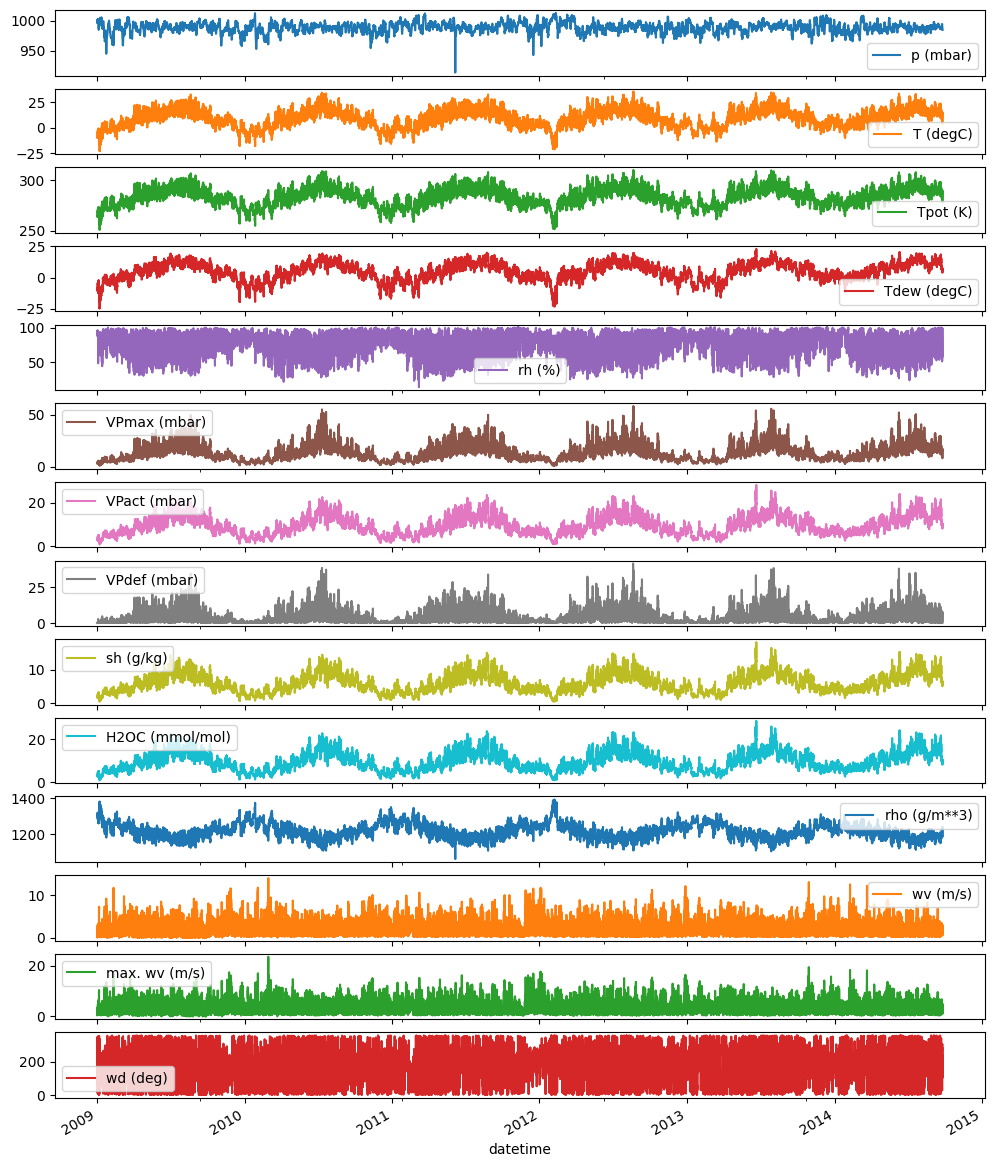

In [ ]:
# Dibujemos nuestras variables
cols = df.columns

# N = 24*30*12 # Dibujar 1 año continuo
N = df.shape[0]
plots = df[cols][0:N]
plots.index = df.index[0:N]
_ = plots.plot(subplots=True, figsize=(12,16))

**Observaciones**:
- Las variables tienen diferentes rangos de amplitud. Antes de llevar los datos a la Red LSTM debemos escalarlas/estandarizarlas.
- Al parecer existe un *outlier* en la presión (aproximadamente 950 mbars). Sin embargo este dato es normal, pues la presión puede variar entre 100 y 1.050

El segundo paso es verificar si existen datos faltantes:

In [ ]:
# Verificar si hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 8
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 13
	Columna rho (g/m**3): 6
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


Las columnas *VPmax (mbar)*, *H2OC (mmol/mol)* y *rho (g/m**3)* tienen datos faltantes. En un momento realizaremos el manejo de estos datos.

El tercer paso es garantizar que la periodicidad de las muestras es exactamente de 1 hora:

In [ ]:
# Verificar si la periodicidad de las muestras es exactamente
# 1 hora (3600 secs)

# Calcular diferencias (en segundos) entre cada par de datos
# consecutivos
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50189
1800.0       61
0.0          24
4200.0        2
4800.0        1
Name: datetime, dtype: int64


Vemos que:

- 61 pares de registros tienen diferencias de 1.800 s (30 min)
- 24 pares de registros tienen diferencias de 0.0 s
- 2 pares de registros tienen diferencias de 4200 s (1.16 hrs)
- 1 par de registros tiene diferencias de 4.800 s (1.3 hrs)

En un momento veremos cómo corregir este comportamiento.

## 7. Pre-procesamiento

Realizaremos dos tareas:
- Manejo de datos faltantes
- Ajuste de la periodicidad del dataset

### 7.1. Manejo de datos faltantes

Dado el reducido número de datos faltantes, podemos usar una simple interpolación para completarlos:

In [ ]:
# Interpolación lineal para completar datos faltantes
columns = ['VPmax (mbar)', 'H2OC (mmol/mol)', 'rho (g/m**3)']

for column in columns:
    df[column] = df[column].interpolate(method='linear')

# Verificar que no hay datos faltantes
print('Cantidad de NaNs:')
for column in df:
    nans = df[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


### 7.2. Ajuste de la periodicidad del dataset

Recordemos que hay:

- 61 pares de registros con diferencias de 1.800 s (30 min)
- 24 pares de registros con diferencias de 0.0 s
- 2 pares de registros con diferencias de 4200 s (1.16 hrs)
- 1 par de registros con diferencias de 4.800 s (1.3 hrs)


Corrijamos los pares de registros con diferencias de 0.0s que son simplemente registros repetidos:

In [ ]:
# Eliminar duplicados para corregir el problema de diferencias
# de 0.0 s
df.drop_duplicates(keep='first', inplace=True, ignore_index=False)

# Y verificar que han sido eliminados
df_time_diffs = df.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50189
1800.0       61
4200.0        2
4800.0        1
Name: datetime, dtype: int64


Y ahora corrijamos los datos restantes para garantizar que entre pares de datos consecutivos habrá una periodicidad de 1 hora.

Usaremos el método *asfreq* de Pandas. Como aparecerán nuevos datos, usaremos el método *bfill* para rellenar estos nuevos datos:

In [ ]:
# Reinterpolar el dataset con una periodicidad de 1 hora
df2 = df.asfreq(freq='H', method='bfill')

# Y verificar que la totalidad del dataset tiene esta periodicidad
df_time_diffs = df2.index.to_series().diff().dt.total_seconds()
print(df_time_diffs.value_counts())

3600.0    50223
Name: datetime, dtype: int64


In [ ]:
# Verificar que el dataset resultante no contiene NaNs:
print('Cantidad de NaNs:')
for column in df:
    nans = df2[column].isna().sum()
    print(f'\tColumna {column}: {nans}')

Cantidad de NaNs:
	Columna p (mbar): 0
	Columna T (degC): 0
	Columna Tpot (K): 0
	Columna Tdew (degC): 0
	Columna rh (%): 0
	Columna VPmax (mbar): 0
	Columna VPact (mbar): 0
	Columna VPdef (mbar): 0
	Columna sh (g/kg): 0
	Columna H2OC (mmol/mol): 0
	Columna rho (g/m**3): 0
	Columna wv (m/s): 0
	Columna max. wv (m/s): 0
	Columna wd (deg): 0


In [ ]:
# Y finalmente verificar las columnas originales y modificadas
# para constatar que los valores promedio no cambian

for column in df:
    print(f'Promedios original/modificado: {df[column].mean():.2f}/{df2[column].mean():.2f}')

Promedios original/modificado: 988.66/988.66
Promedios original/modificado: 9.26/9.25
Promedios original/modificado: 283.35/283.34
Promedios original/modificado: 4.77/4.77
Promedios original/modificado: 76.00/76.02
Promedios original/modificado: 13.47/13.46
Promedios original/modificado: 9.47/9.47
Promedios original/modificado: 4.00/3.99
Promedios original/modificado: 5.98/5.98
Promedios original/modificado: 9.58/9.58
Promedios original/modificado: 1216.29/1216.31
Promedios original/modificado: 2.15/2.15
Promedios original/modificado: 3.55/3.55
Promedios original/modificado: 173.44/173.42


En este punto ya contamos con un dataset íntegro (no contiene datos faltantes ni *outliers* y tiene una periodicidad de 1 hora).

Solo nos resta guardarlo:

In [ ]:
df2.to_csv(ruta+'weather_dataset_preprocesado.csv')

## 8. Conclusión

Aunque cada proyecto tendrá sus particularidades, en general el análisis exploratorio y pre-procesamiento de la serie de tiempo requerido para trabajar con Redes LSTM implica:

- Entender las variables que ingresarán al modelo (variable a predecir y variables predictoras)
- Realizar el manejo de datos faltantes (si existen) y *outliers* (si existen)
- Garantizar que entre muestras consecutivas existe la misma periodicidad

Este dataset será el punto de partida para todos los modelos de Redes LSTM que implementaremos más adelante, comenzando en el próximo video con el modelo más simple: univariado + uni-step.
